<a href="https://colab.research.google.com/github/emely3h/Geospatial_ML/blob/main/best_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Best performing model

### 0. Prepare Colab, Define Constants

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#! ls
%cd drive/MyDrive/MachineLearning/
#! git clone https://github.com/emely3h/Geospatial_ML.git
%cd Geospatial_ML
! ls

/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning
/content/drive/.shortcut-targets-by-id/15HUD3sGdfvxy5Y_bjvuXgrzwxt7TzRfm/MachineLearning/Geospatial_ML
data_exploration  experiments	     models	   pyproject.toml    scripts
docs		  image_processing   poetry.lock   README.md
evaluation	  metrics_bug.ipynb  prepare_data  requirements.txt


In [51]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from keras.losses import categorical_crossentropy
from tensorflow.keras.models import load_model
from data_exploration.mask_stats import Mask_Stats

In [4]:
total_tiles = 11121
train_tiles = 6672
test_val_tiles = 2224
data_path = "../data_colab/256_256"
experiment = "experiment_8"
batch_size = 32
tile_size = 256
step_size = 256

### Model summary

In [5]:
model = load_model('../models/experiment_8/model_256_256_3_4_layers_64_128_256.h5')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 5  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  2944        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

### Model history

In [38]:
def plot_metrics(plots, model_history, scale):
    x = [i for i in range(len(model_history['loss']))]

    loss = model_history['loss']
    acc = model_history['accuracy']
    mean_iou = model_history['mean_iou']

    val_acc = model_history['val_accuracy']
    val_mean_iou = model_history['val_mean_iou']
    val_loss = model_history['val_loss']
    val_land_iou = model_history['val_land_iou']
    val_invalid_iou = model_history['val_invalid_iou']
    val_valid_iou = model_history['val_valid_iou']

    plt.figure(figsize=(10, 6))
    if 'loss' in plots:
        print(f'Min training loss: {min(model_history["loss"])}')
        plt.scatter(x, loss, s=10, label='Training Loss')

    if 'accuracy' in plots:
        print(f'Max training accuracy: {max(model_history["accuracy"])}')
        plt.scatter(x, acc, s=10, label='Training Accuracy')
    if 'mean_iou' in plots:
        print(f'Max training iou: {max(model_history["mean_iou"])}')
        plt.scatter(x, mean_iou, s=10, label='Training mean_iou')
    if 'val_loss' in plots:
        print(f'Min validation loss: {min(model_history["val_loss"])}')
        plt.scatter(x, val_loss, s=10, label='Validation Loss')

    if 'val_accuracy' in plots:
        print(f'Max validation accuracy: {max(model_history["val_accuracy"])}')
        plt.scatter(x, val_acc, s=10, label='Validation Accuracy')

    if 'val_mean_iou' in plots:
        print(f'Max validation mean_iou: {max(model_history["val_mean_iou"])}')
        plt.scatter(x, val_mean_iou, s=10, label='Validation mean_iou')

    if 'val_invalid_iou' in plots:
        print(f'Max validation invalid_iou: {max(model_history["val_invalid_iou"])}')
        plt.scatter(x, val_invalid_iou, s=10, label='Validation invalid_iou')

    if 'val_valid_iou' in plots:
        print(f'Max validation valid_iou: {max(model_history["val_valid_iou"])}')
        plt.scatter(x, val_valid_iou, s=10, label='Validation valid_iou')

    if 'val_land_iou' in plots:
        print(f'Max validation land_iou: {max(model_history["val_land_iou"])}')
        plt.scatter(x, val_land_iou, s=10, label='Validation land_iou')

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.ylim(scale)
    plt.legend()
    plt.show()


In [10]:
with open('../models/experiment_8/history_256_256_3_4_layers_64_128_256.pkl', 'rb') as file:
    history = pickle.load(file)

history.keys()


dict_keys(['loss', 'mean_iou', 'invalid_iou', 'valid_iou', 'land_iou', 'accuracy', 'val_loss', 'val_mean_iou', 'val_invalid_iou', 'val_valid_iou', 'val_land_iou', 'val_accuracy'])

Min training loss: 0.04151595011353493
Min validation loss: 0.04960821196436882


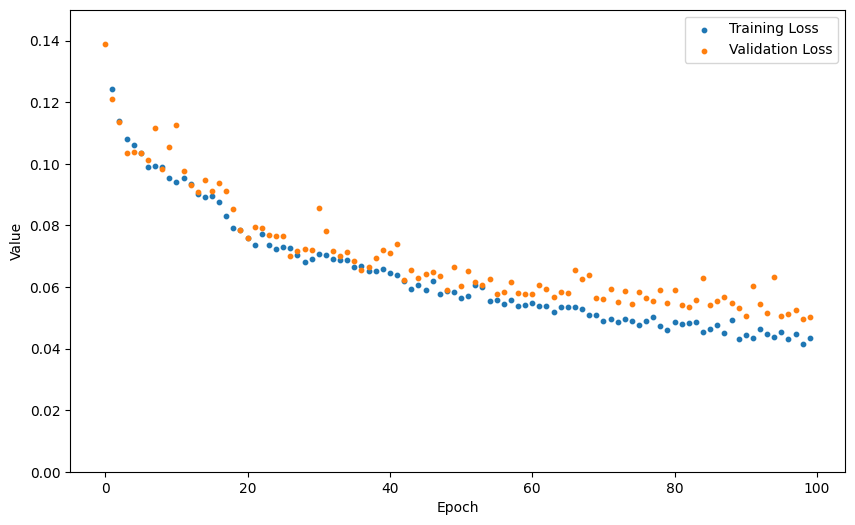

In [39]:
plot_metrics(['loss', 'val_loss'], history, [0,0.15])

Max training accuracy: 0.9838057160377502
Max training iou: 0.9612757563591003
Max validation accuracy: 0.9816277623176575
Max validation mean_iou: 0.9559821486473083


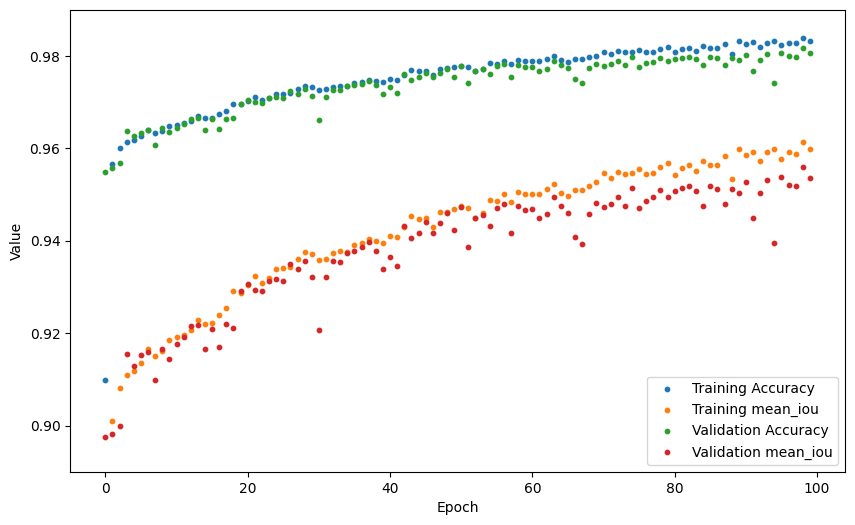

In [41]:
plot_metrics(['mean_iou', 'accuracy', 'val_mean_iou', 'val_accuracy'], history, [0.89,0.99])

Max validation mean_iou: 0.9559821486473083
Max validation invalid_iou: 0.9235024452209473
Max validation valid_iou: 0.9449118375778198
Max validation land_iou: 0.9996103644371033


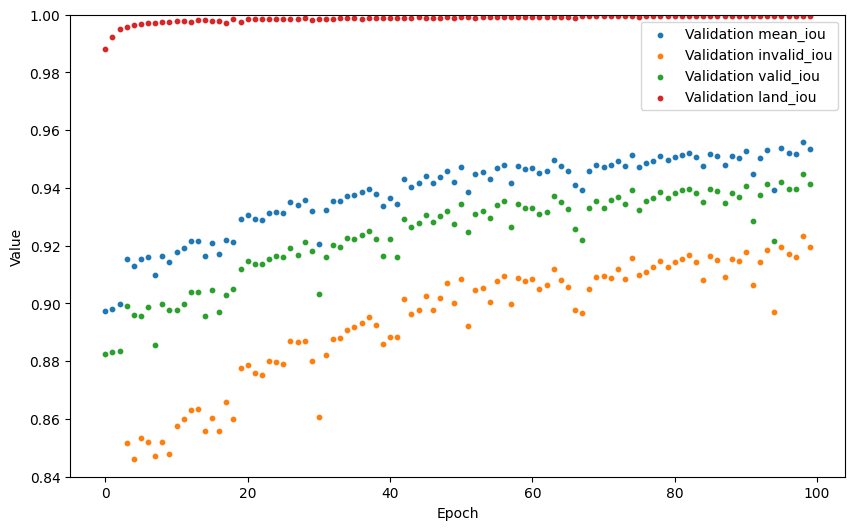

In [43]:
plot_metrics(['val_mean_iou', 'val_invalid_iou', 'val_valid_iou', 'val_land_iou'], history, [0.84,1])

### Model metrics

In [49]:
metrics = []
with open('../metrics/experiment_8/metrics_test_3_4_layers_64_128_256.pkl', 'rb') as file:
  metrics.append(pickle.load(file).__dict__)
with open('../metrics/experiment_8/metrics_val_3_4_layers_64_128_256.pkl', 'rb') as file:
  metrics.append(pickle.load(file).__dict__)
with open('../metrics/experiment_8/metrics_train_3_4_layers_64_128_256.pkl', 'rb') as file:
  metrics.append(pickle.load(file).__dict__)

df = pd.DataFrame(metrics)
df.index = ['test data', 'val data', 'train data']
df.transpose()

,test data,val data,train data
iou_invalid,0.927203,0.923502,0.958031
iou_valid,0.947970,0.944912,0.965662
iou_land,0.999551,0.999532,0.999598
mean_iou,0.958241,0.955982,0.974430
precision_invalid,0.973096,0.976975,0.985206
precision_valid,0.965816,0.960096,0.977314
precision_land,0.999611,0.999591,0.999646
mean_precision,0.979508,0.978887,0.987389
recall_invalid,0.951597,0.944050,0.972014
recall_valid,0.980881,0.983538,0.987805


### Model predictions

In [50]:
class DataGenerator(Sequence):
    def __init__(self, mmap_x, mmap_y, batch_size):
        self.x_input = mmap_x
        self.y_mask = mmap_y
        self.batch_size = batch_size
        self.num_samples = self.x_input.shape[0]

    # returns number of batches as int
    def __len__(self):
        return int(np.ceil(self.num_samples / float(self.batch_size)))

    # returns single batch
    def __getitem__(self, index):
        batch_indices = slice(index * self.batch_size, (index + 1) * self.batch_size)
        batch_inputs = self.x_input[batch_indices]
        batch_masks = self.y_mask[batch_indices]

        # normalization
        batch_inputs = batch_inputs/255
        # one-hot-encoding
        batch_masks = np.array([tf.one_hot(item, depth=3).numpy() for item in batch_masks])

        # normalization + one hot encoding
        return batch_inputs, batch_masks

    def getitem_as_img(self, index):
        batch_indices = slice(index * self.batch_size, (index + 1) * self.batch_size)
        batch_inputs = self.x_input[batch_indices]
        batch_masks = self.y_mask[batch_indices]
        # normalization + one hot encoding
        return batch_inputs, batch_masks

In [52]:
train_split_x = np.memmap(os.path.join(data_path, "train_split_x.npy"), mode="r", shape=(train_tiles, 256, 256, 5), dtype=np.uint8)
train_split_y = np.memmap(os.path.join(data_path, "train_split_y.npy"), mode="r", shape=(train_tiles, 256, 256), dtype=np.uint8)
val_split_x = np.memmap(os.path.join(data_path, "val_split_x.npy"), mode="r", shape=(test_val_tiles, 256, 256, 5), dtype=np.uint8)
val_split_y = np.memmap(os.path.join(data_path, "val_split_y.npy"), mode="r", shape=(test_val_tiles, 256, 256), dtype=np.uint8)
test_split_x = np.memmap(os.path.join(data_path, "test_split_x.npy"), mode="r", shape=(test_val_tiles, 256, 256, 5), dtype=np.uint8)
test_split_y = np.memmap(os.path.join(data_path, "test_split_y.npy"), mode="r", shape=(test_val_tiles, 256, 256), dtype=np.uint8)

train_stats = Mask_Stats(train_split_y)
train_stats.print_stats()
print()
val_stats = Mask_Stats(val_split_y)
val_stats.print_stats()
print()
test_stats = Mask_Stats(test_split_y)
test_stats.print_stats()

Shape: (6672, 256, 256)
Land pixels: 195058814  44.610 %
Valid pixels: 138904480  31.767 %
Invalid pixels: 103292898  23.623 %
Sum: 6672

Shape: (2224, 256, 256)
Land pixels: 65320265  44.816 %
Valid pixels: 46246663  31.730 %
Invalid pixels: 34185136  23.454 %
Sum: 2224

Shape: (2224, 256, 256)
Land pixels: 64786699  44.450 %
Valid pixels: 46892391  32.173 %
Invalid pixels: 34072974  23.377 %
Sum: 2224


In [53]:
def display_image(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        if len(display_list[i].shape) == 3:
            plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
            #plt.axis('off')
        else:
            plt.imshow(display_list[i])
    plt.show()


def display(list_train, list_mask):
    for idx, img_train in enumerate(list_train):
        sample_image, sample_mask = list_train[idx], list_mask[idx]
        sample_image = sample_image[..., :4]
        display_image([sample_image, sample_mask])

In [54]:
batch_size = 32

train_generator = DataGenerator(train_split_x, train_split_y, batch_size)
val_generator = DataGenerator(val_split_x, val_split_y, batch_size)
test_generator = DataGenerator(test_split_x, test_split_y, batch_size)

print(train_generator.__len__())
print(val_generator.__len__())
print(test_generator.__len__())

209
70
70


In [ ]:
pred_test = model.predict(x_test)
pred_val = model.predict(x_val)
pred_train = model.predict(x_train)

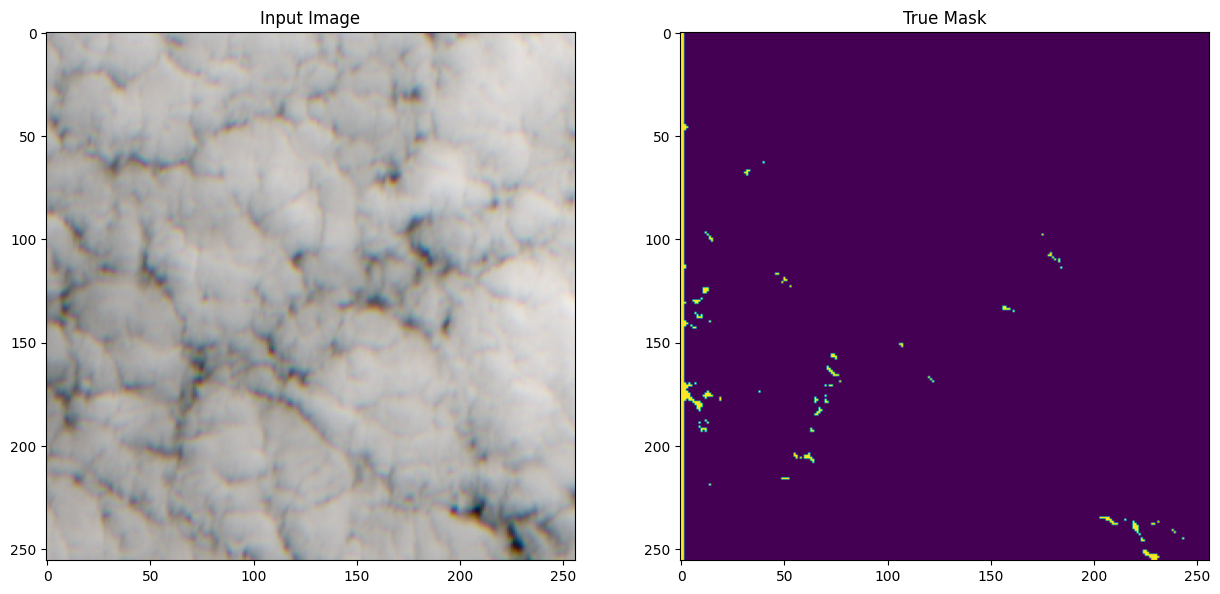

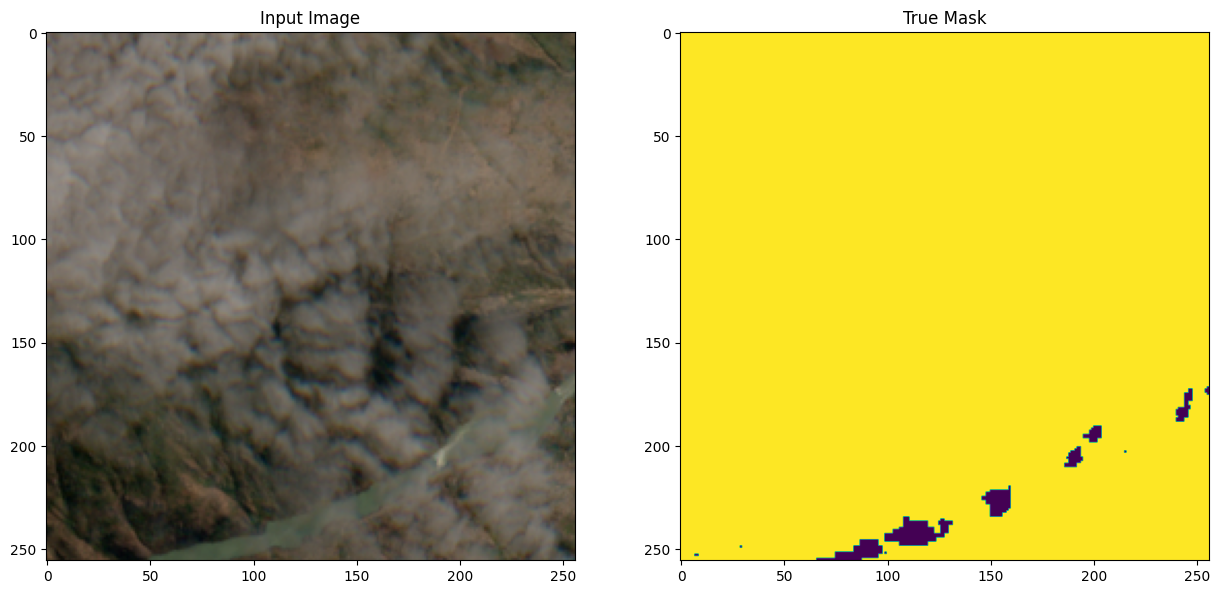

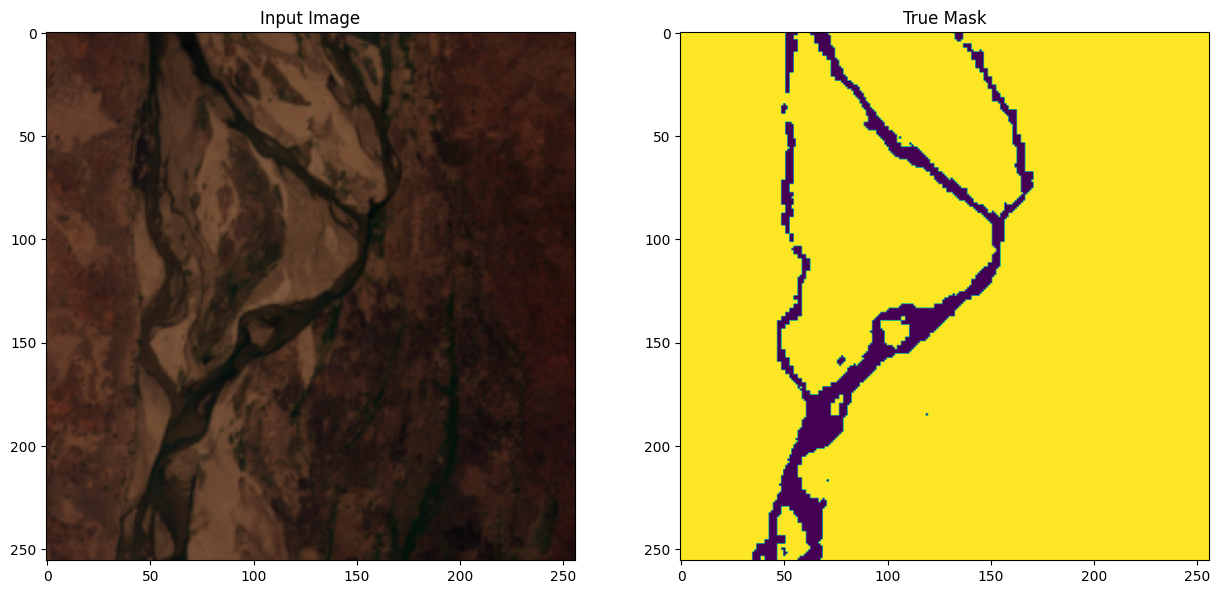

In [56]:
def make_predictions(x_input, y_true, y_pred):
  for idx, img in enumerate(x_input):
    x_img = x_input[idx]
    x_img = x_img[..., :4]
    display_image([x_img, y_test[idx], pred_test[idx]])

make_predictions(x_test[:10], y_test[:10], pred_test[:10])